# **Assignment 1: Kaggle Competition**



Imports and load saved datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")

import os, sys
cwd = os.getcwd()
sys.path.append(os.path.join(cwd, "../"))

from src.data.sets import load_dataframes

In [2]:
df_train_name = "NBA_train"
df_test_name = "NBA_test"

df_train = pd.read_csv(f"../data/raw/{df_train_name}.csv")
df_test = pd.read_csv(f"../data/raw/{df_test_name}.csv")

X_train, y_train, X_val, y_val, X_test, y_test = load_dataframes()

### 6. Modelling

#### 6.3 Train Decision Tree

Instantiate a DecisionTreeClassifier() model with random_state=8 parameter in order to keep our results consistent.

Reduce overfitting with class_weight, min_samples_split, and max_depth.

In [3]:
tree = DecisionTreeClassifier(
    random_state=8,
    class_weight='balanced',
    # min_samples_split=5,
    min_samples_split=10,
    # min_samples_split=20,
    # min_samples_split=40,
    # max_depth=3,
    max_depth=6,
    # max_depth=8,
)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=10, random_state=8)

**[6.3.1]** Print the accuracy score of the training and test sets

In [4]:
print("Train:", tree.score(X_train, y_train))
print("Test:", tree.score(X_test, y_test))

Train: 0.696484375
Test: 0.651875


This initial model is achieving fair results. It got an accuracy score of 0.70.

**[6.3.2]** Plot the confusion matrics for the training and validation sets

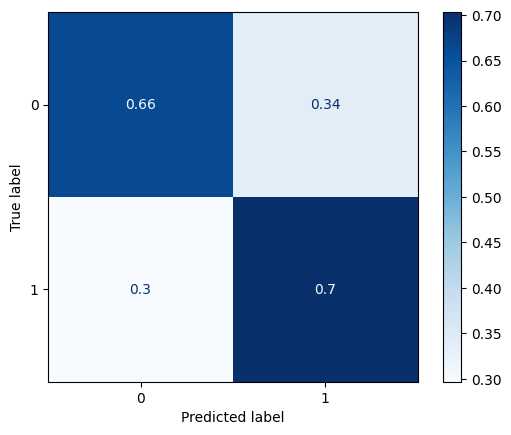

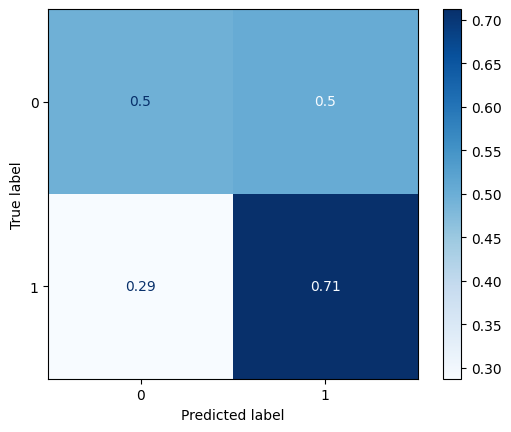

In [193]:
ConfusionMatrixDisplay.from_estimator(tree, X_train, y_train, cmap=plt.cm.Blues, normalize='true')
ConfusionMatrixDisplay.from_estimator(tree, X_val, y_val, cmap=plt.cm.Blues, normalize='true')

**[6.3.3]** Print the accuracy score of the validation set

In [194]:
tree.score(X_val, y_val)

0.671875

**[6.3.4]** Print the confusion matrix on the validation set

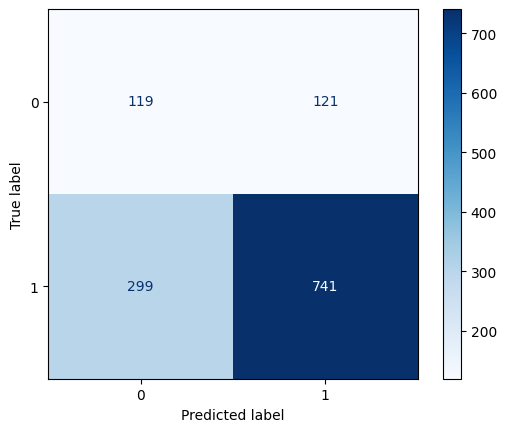

In [195]:
ConfusionMatrixDisplay.from_estimator(tree, X_val, y_val,cmap=plt.cm.Blues)

The model is doing a fair good job but it is still overfitting.

**[6.3.5]** Print the accuracy score of the training and validation sets

In [196]:
print(tree.score(X_train, y_train))
print(tree.score(X_val, y_val))

0.696484375
0.671875


The accuracy scores for the training and validation sets are relatively closer to each other.

**[6.3.6]** Plot the confusion matrics for the training and validation sets

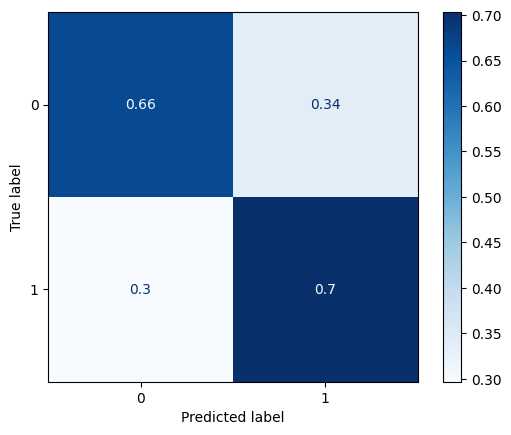

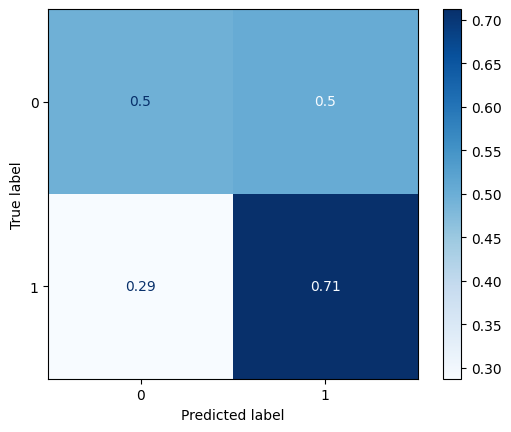

In [197]:
ConfusionMatrixDisplay.from_estimator(tree, X_train, y_train, cmap=plt.cm.Blues, normalize='true')
ConfusionMatrixDisplay.from_estimator(tree, X_val, y_val, cmap=plt.cm.Blues, normalize='true')

The confusion matrices show relatively similar patterns.

The model is quite overfitting and may not yield good results.

**[6.3.7]** Print the accuracy score on the testing set

In [198]:
tree.score(X_test, y_test)

0.651875

**[6.3.8]** Print the confusion matrix on the testing set

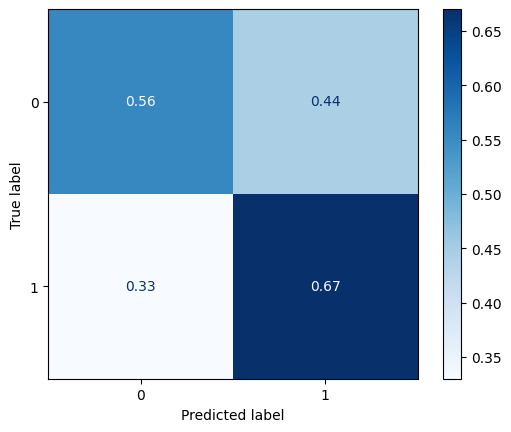

In [199]:
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

The accuracy score for the testing set is close to the ones achieved on the training and testing sets.

**[6.3.9]** Print the classification reports on the training, testing and validation sets

In [201]:
tree_y_preds_train = tree.predict(X_train)
print(classification_report(y_train, tree_y_preds_train, target_names=['major', 'minor']))

tree_y_preds_test = tree.predict(X_test)
print(classification_report(y_test, tree_y_preds_test, target_names=['major', 'minor']))

tree_y_preds_val = tree.predict(X_val)
print(classification_report(y_val, tree_y_preds_val, target_names=['major', 'minor']))

              precision    recall  f1-score   support

       major       0.30      0.66      0.42       834
       minor       0.91      0.70      0.80      4286

    accuracy                           0.70      5120
   macro avg       0.61      0.68      0.61      5120
weighted avg       0.81      0.70      0.73      5120

              precision    recall  f1-score   support

       major       0.24      0.56      0.34       257
       minor       0.89      0.67      0.76      1343

    accuracy                           0.65      1600
   macro avg       0.57      0.61      0.55      1600
weighted avg       0.78      0.65      0.70      1600

              precision    recall  f1-score   support

       major       0.28      0.50      0.36       240
       minor       0.86      0.71      0.78      1040

    accuracy                           0.67      1280
   macro avg       0.57      0.60      0.57      1280
weighted avg       0.75      0.67      0.70      1280



**[6.3.10]** Predict with test set `NBA_test`

In [202]:
df = df_test.copy()
X_preds_val = df
tree_y_preds_val = tree.predict(X_preds_val)

In [203]:
df["TARGET_5Yrs"] = tree_y_preds_val
df = df[["Id", "TARGET_5Yrs"]]

**[6.3.11]** Save predictions to CSV

In [204]:
df.to_csv(f'../models/tree_{df_test_name}.csv', index=False)